# Plotly: Trading charts examples

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Chart 2 panes: Bars + Volume

In [2]:
# Generate sample data
n = 500
np.random.seed(42)
dates = pd.date_range(start='2024-01-01', periods=n, freq='D')
opens = np.random.normal(100, 2, n)
closes = opens + np.random.normal(0, 2, n)
highs = np.maximum(opens, closes) + np.random.uniform(0, 1, n)
lows = np.minimum(opens, closes) - np.random.uniform(0, 1, n)
volumes = np.random.uniform(1000, 5000, n)

# Create DataFrame
df = pd.DataFrame({
    'Date': dates,
    'Open': opens,
    'High': highs,
    'Low': lows,
    'Close': closes,
    'Volume': volumes
})

df.head()

Date        Open        High         Low       Close       Volume
0 2024-01-01  100.993428  103.013266  100.277105  102.845783  1876.275236
1 2024-01-02   99.723471  103.646873   99.651387  103.542305  1146.885450
2 2024-01-03  101.295377  101.931807   98.426985   98.498242  1432.103017
3 2024-01-04  103.046060  104.878474  103.033951  104.171998  2355.442597
4 2024-01-05   99.531693   99.563279   97.273907   98.230408  4210.342718

In [3]:
# Create the figure with secondary y-axis
fig = make_subplots(rows=2, cols=1, 
                    shared_xaxes=True, 
                    vertical_spacing=0.03, 
                    row_heights=[0.7, 0.3])

# Add candlestick chart
fig.add_trace(go.Candlestick(
    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name='OHLC'
), row=1, col=1)

# Add volume bar chart
fig.add_trace(go.Bar(
    x=df['Date'],
    y=df['Volume'],
    name='Volume'
), row=2, col=1)

# Update layout
fig.update_layout(
    title='Candlestick Chart with Volume',
    yaxis_title='Price',
    yaxis2_title='Volume',
    height=800,
    showlegend=True,
    # Move rangeslider to bottom
    xaxis2=dict(
        rangeslider=dict(
            visible=True,
            thickness=0.05
        )
    ),
    # Hide rangeslider for top chart
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)

# Update y-axes ranges to remove auto-scaling
fig.update_yaxes(fixedrange=False)  # Allow zooming on y-axis

# Show the plot
fig.show()

## Chart 3 panes: Bars with SMA(20) + Volume + SMA(50)

In [4]:
# Generate sample data
np.random.seed(42)
dates = pd.date_range(start='2024-01-01', periods=100, freq='D')  # Increased to 100 days
opens = np.random.normal(100, 2, 100)
closes = opens + np.random.normal(0, 2, 100)
highs = np.maximum(opens, closes) + np.random.uniform(0, 1, 100)
lows = np.minimum(opens, closes) - np.random.uniform(0, 1, 100)
volumes = np.random.uniform(1000, 5000, 100)

# Create DataFrame
df = pd.DataFrame({
    'Date': dates,
    'Open': opens,
    'High': highs,
    'Low': lows,
    'Close': closes,
    'Volume': volumes
})

# Calculate SMAs
df['SMA20'] = df['Close'].rolling(window=20).mean()
df['SMA50'] = df['Close'].rolling(window=50).mean()

# Preview
df.tail()

Date        Open        High        Low       Close       Volume  \
95 2024-04-05   97.072970   98.419079  96.954152   97.843605  3481.238205   
96 2024-04-06  100.592241  100.980410  98.706999   98.824526  3816.319072   
97 2024-04-07  100.522111  101.472849  99.872900  100.829561  1851.856646   
98 2024-04-08  100.010227  100.584897  99.264182  100.126644  1545.485902   
99 2024-04-09   99.530826  100.076443  96.661516   97.244885  1058.178663   

        SMA20       SMA50  
95  99.865527  100.160386  
96  99.796748  100.204780  
97  99.722774  100.231905  
98  99.746396  100.199815  
99  99.535380  100.203355

In [5]:
# Create the figure with three subplots
fig = make_subplots(rows=3, cols=1, 
                    shared_xaxes=True, 
                    vertical_spacing=0.03, 
                    row_heights=[0.5, 0.25, 0.25])

# Add candlestick chart
fig.add_trace(go.Candlestick(
    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name='OHLC'
), row=1, col=1)

# Add SMA20 to price chart
fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['SMA20'],
    line=dict(color='orange', width=2),
    name='SMA(20)'
), row=1, col=1)

# Add volume bar chart
fig.add_trace(go.Bar(
    x=df['Date'],
    y=df['Volume'],
    name='Volume'
), row=2, col=1)

# Add SMA50 in separate pane
fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['SMA50'],
    line=dict(color='blue', width=2),
    name='SMA(50)'
), row=3, col=1)

# Update layout
fig.update_layout(
    title='Candlestick Chart with Volume and SMAs',
    yaxis_title='Price',
    yaxis2_title='Volume',
    yaxis3_title='SMA(50)',
    height=900,  # Increased height to accommodate new pane
    showlegend=True,
    # Move rangeslider to bottom (now on xaxis3)
    xaxis3=dict(
        rangeslider=dict(
            visible=True,
            thickness=0.05
        )
    ),
    # Hide rangeslider for other charts
    xaxis=dict(rangeslider=dict(visible=False)),
    xaxis2=dict(rangeslider=dict(visible=False))
)

# Update y-axes ranges to remove auto-scaling
fig.update_yaxes(fixedrange=False)  # Allow zooming on y-axis

# Show the plot
fig.show()

## Chart: 1/5/15-min timeframes

In [6]:
# Generate 1-minute data
def generate_1min_data(n_periods=480*2):  # 16 hours of 1-min data
    np.random.seed(42)
    
    # Generate initial close prices using random walk
    returns = np.random.normal(0, 0.0003, n_periods)
    close_prices = 100 * np.exp(np.cumsum(returns))
    
    # Initialize data storage
    data = []
    current_time = datetime(2024, 1, 1, 9, 30)  # Start at market open
    current_price = close_prices[0]
    
    for i in range(n_periods):
        # Generate realistic OHLC based on close price
        close = close_prices[i]
        open_price = current_price  # Previous close becomes next open
        high = max(open_price, close) * (1 + abs(np.random.normal(0, 0.0002)))
        low = min(open_price, close) * (1 - abs(np.random.normal(0, 0.0002)))
        
        data.append({
            'time': current_time,
            'open': open_price,
            'high': high,
            'low': low,
            'close': close
        })
        
        current_price = close
        current_time += timedelta(minutes=1)
    
    return pd.DataFrame(data)

# Aggregate data to higher timeframes
def aggregate_ohlc(df, minutes):
    df_resampled = df.set_index('time')
    agg_dict = {
        'open': 'first',
        'high': 'max',
        'low': 'min',
        'close': 'last'
    }
    aggregated = df_resampled.resample(f'{minutes}min').agg(agg_dict).reset_index()
    return aggregated

In [7]:
# Generate data for 3 timeframes
df_1min = generate_1min_data()
df_5min = aggregate_ohlc(df_1min, 5)
df_15min = aggregate_ohlc(df_1min, 15)

# Preview
df_1min.head()

time        open        high         low       close
0 2024-01-01 09:30:00  100.014903  100.027759   99.988316  100.014903
1 2024-01-01 09:31:00  100.014903  100.018834   99.996572  100.010754
2 2024-01-01 09:32:00  100.010754  100.031984   99.981949  100.030189
3 2024-01-01 09:33:00  100.030189  100.089442   99.994159  100.075904
4 2024-01-01 09:34:00  100.075904  100.076708  100.040239  100.068874

In [8]:
# Create subplot figure
fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    subplot_titles=('1-minute', '5-minute', '15-minute'),
    row_heights=[0.4, 0.3, 0.3]
)

# Add candlesticks for each timeframe
timeframes = [(df_1min, 1), (df_5min, 2), (df_15min, 3)]

for df, row in timeframes:
    fig.add_trace(
        go.Candlestick(
            x=df['time'],
            open=df['open'],
            high=df['high'],
            low=df['low'],
            close=df['close'],
            name=f'{row*1 if row==1 else row*5 if row==2 else 15}-min'
        ),
        row=row, col=1
    )

# Update layout
fig.update_layout(
    height=900,
    title='Multi-timeframe Candlestick Charts',
    showlegend=True,
    xaxis=dict(rangeslider=dict(visible=False)),
    xaxis2=dict(rangeslider=dict(visible=False)),
    xaxis3=dict(rangeslider=dict(visible=True, thickness=0.05))
)

# Allow y-axis zooming
fig.update_yaxes(fixedrange=False)

fig.show()

## Chart: 1/5/15-min timeframes + EMA(20/50/100/200)

In [9]:
# Generate data for all timeframes
df_1min = generate_1min_data()
df_5min = aggregate_ohlc(df_1min, 5)
df_15min = aggregate_ohlc(df_1min, 15)

# Calculate EMAs for all timeframes
for df in [df_1min, df_5min, df_15min]:
    df['EMA20'] = df['close'].ewm(span=20, adjust=False).mean()
    df['EMA50'] = df['close'].ewm(span=50, adjust=False).mean()
    df['EMA100'] = df['close'].ewm(span=100, adjust=False).mean()
    df['EMA200'] = df['close'].ewm(span=200, adjust=False).mean()

# Preview
df_1min.tail()

time        open        high         low       close  \
955 2024-01-02 01:25:00  100.580702  100.627246  100.571481  100.614421   
956 2024-01-02 01:26:00  100.614421  100.666768  100.602657  100.624767   
957 2024-01-02 01:27:00  100.624767  100.639181  100.606459  100.638556   
958 2024-01-02 01:28:00  100.638556  100.674612  100.625115  100.655759   
959 2024-01-02 01:29:00  100.655759  100.675163  100.651988  100.669280   

          EMA20       EMA50      EMA100      EMA200  
955  100.597503  100.570004  100.439655  100.247045  
956  100.600099  100.572151  100.443320  100.250804  
957  100.603762  100.574756  100.447186  100.254662  
958  100.608714  100.577932  100.451316  100.258653  
959  100.614482  100.581514  100.455633  100.262739

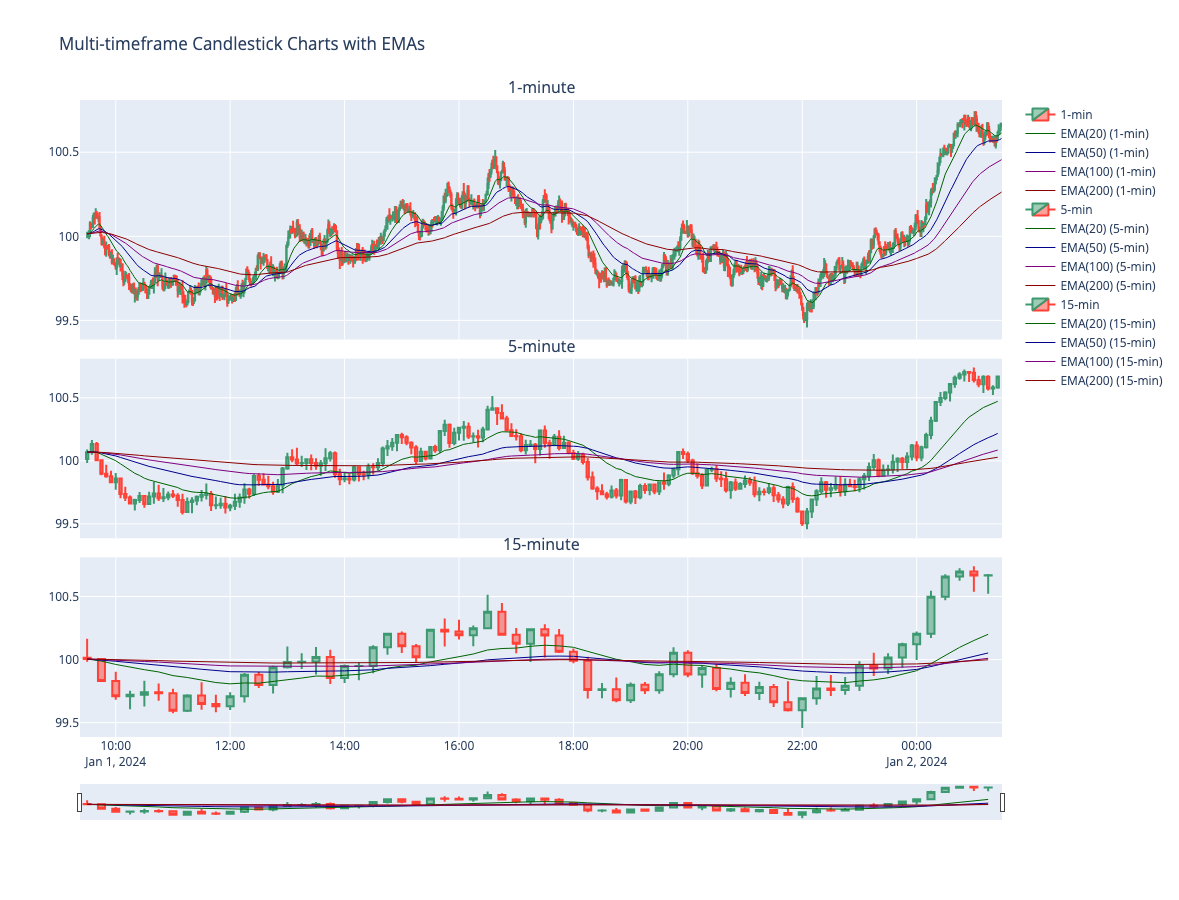

In [10]:
# Create subplot figure
fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    subplot_titles=('1-minute', '5-minute', '15-minute'),
    row_heights=[0.4, 0.3, 0.3]
)

# EMA configuration for consistent colors and names
ema_configs = [
    ('EMA20', 'darkgreen', 'EMA(20)'),
    ('EMA50', 'darkblue', 'EMA(50)'),
    ('EMA100', 'purple', 'EMA(100)'),
    ('EMA200', 'darkred', 'EMA(200)')
]

# Function to add candlestick and EMAs for a timeframe
def add_timeframe_plots(df, row, candlestick_name):
    # Add candlestick
    fig.add_trace(
        go.Candlestick(
            x=df['time'],
            open=df['open'],
            high=df['high'],
            low=df['low'],
            close=df['close'],
            name=candlestick_name
        ),
        row=row, col=1
    )
    
    # Add EMAs
    for col, color, name in ema_configs:
        fig.add_trace(
            go.Scatter(
                x=df['time'],
                y=df[col],
                line=dict(color=color, width=1),
                name=f"{name} ({candlestick_name})",
                showlegend=True
            ),
            row=row, col=1
        )

# Add plots for each timeframe
add_timeframe_plots(df_1min, 1, '1-min')
add_timeframe_plots(df_5min, 2, '5-min')
add_timeframe_plots(df_15min, 3, '15-min')

# Update layout
fig.update_layout(
    height=900,
    title='Multi-timeframe Candlestick Charts with EMAs',
    showlegend=True,
    xaxis=dict(rangeslider=dict(visible=False)),
    xaxis2=dict(rangeslider=dict(visible=False)),
    xaxis3=dict(rangeslider=dict(visible=True, thickness=0.05))
)

# Allow y-axis zooming
fig.update_yaxes(fixedrange=False)

fig.show()